#  `satn_to_movie` 

Produces a movie of the invasion sequence from `ibip filter`. This method can be applied for visualizing image-based invasion percolation algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.visualization.satn_to_movie)

<Signature (im, satn, cmap='viridis', c_under='grey', c_over='white', v_under=0.001, v_over=1.0, fps=10, repeat=True)>

## `im`

The input image is a Boolean image `True` values indicating the void voxels and `False` for solid. Let's create a test image:

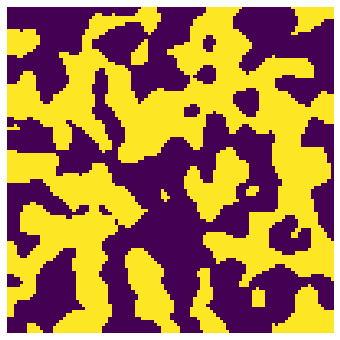

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[100,100], blobiness=1)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## `satn`

The saturation image can be generated from `ibip` data using `seq_to_satn` method. The `satn` is the image of porous material where each voxel indicates the global saturation at which it was invaded. Voxels with 0 values indicate solid and and -1 indicate uninvaded.

In [3]:
bd = np.zeros_like(im, dtype=bool)
bd[:, 0] = 1
bd *= im
out = ps.filters.ibip(im=im, inlets=bd)
inv_seq, inv_size = out.inv_sequence, out.inv_sizes
satn = ps.filters.seq_to_satn(seq=inv_seq)

  0%|          | 0/9999 [00:00<?, ?it/s]

Now we can create an animation of the invasion sequence using `satn_to_movie`: (To save animation as a file and for visualizing use `animation.save')

  0%|          | 0/389 [00:00<?, ?it/s]

 11%|█         | 43/389 [00:00<00:01, 234.61it/s]

 53%|█████▎    | 205/389 [00:00<00:00, 839.69it/s]

 94%|█████████▎| 364/389 [00:00<00:00, 1125.55it/s]

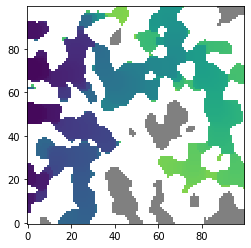

In [4]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn)
mov.save('image_base_ip.gif', writer='imagemagick')

The saved animation can then be visualized:
![image_base_ip](https://user-images.githubusercontent.com/43128873/160906861-d96d1867-e813-4b2c-aef5-a074dc7110fe.gif)

## `cmap`

The Colormap used to map invasion sequence values to colors. By default the cmap is 'viridis'.

  0%|          | 0/389 [00:00<?, ?it/s]

 43%|████▎     | 167/389 [00:00<00:00, 1669.25it/s]

 86%|████████▌ | 334/389 [00:00<00:00, 1631.56it/s]

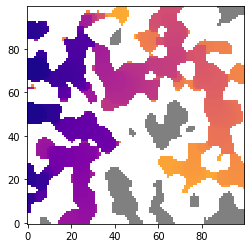

In [5]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, cmap='plasma')
mov.save('image_based_ip_cmap.gif', writer='imagemagick')

![image_based_ip_cmap](https://user-images.githubusercontent.com/43128873/160906891-1c503314-d602-4470-9f68-3569adbbf6e9.gif)

## `c_under`

Colormap to be assigned to the lowest color bound (under color) in the color map. The voxeled colored by `c_under` are the uninvaded void space. The default under color is grey.

  0%|          | 0/389 [00:00<?, ?it/s]

 43%|████▎     | 169/389 [00:00<00:00, 1682.98it/s]

 87%|████████▋ | 338/389 [00:00<00:00, 790.27it/s] 

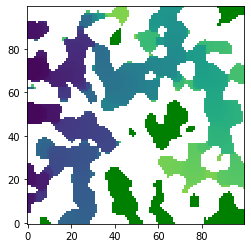

In [6]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, c_under='green')
mov.save('image_based_ip_c_under.gif', writer='imagemagick')

![image_based_ip_c_under](https://user-images.githubusercontent.com/43128873/160906884-c0c17a61-eb22-4ce8-af99-e11fc66d58b1.gif)

## `c_over`

Colormap to be assigned to the highest color bound (over color) in the color map. The voxeled colored by `c_overer` are the solid phase. The default over color is white.

  0%|          | 0/389 [00:00<?, ?it/s]

 44%|████▍     | 171/389 [00:00<00:00, 1709.23it/s]

 88%|████████▊ | 342/389 [00:00<00:00, 1658.37it/s]

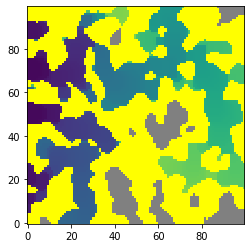

In [7]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, c_over='yellow')
mov.save('image_based_ip_c_over.gif', writer='imagemagick')

![image_based_ip_c_over](https://user-images.githubusercontent.com/43128873/160906875-b4938432-04bd-4931-977f-902788c23d32.gif)

## `v_under`

This is the lowest bound of `satn` data range that the colormap covers. By default, the `v_under` is 0.001.

  0%|          | 0/389 [00:00<?, ?it/s]

 45%|████▌     | 176/389 [00:00<00:00, 1739.76it/s]

 90%|████████▉ | 350/389 [00:00<00:00, 1715.90it/s]

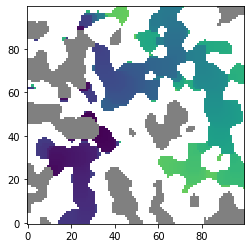

In [8]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, v_under=0.2)
mov.save('image_based_ip_v_under.gif', writer='imagemagick')

![image_based_ip_v_under](https://user-images.githubusercontent.com/43128873/160906913-a32fcb3e-78ae-4ec9-926c-9892b990d578.gif)

## `v_over`

This is the highest bound of `satn` data range that the colormap covers. By default, the `v_over` is 1.

  0%|          | 0/389 [00:00<?, ?it/s]

 46%|████▋     | 180/389 [00:00<00:00, 1799.02it/s]

 93%|█████████▎| 360/389 [00:00<00:00, 1779.96it/s]

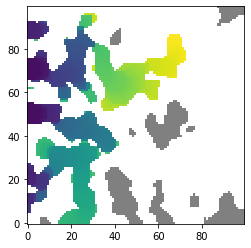

In [9]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, v_over=0.5)
mov.save('image_based_ip_v_over.gif', writer='imagemagick')

![image_based_ip_v_over](https://user-images.githubusercontent.com/43128873/160906906-29747e75-b80f-49a1-a842-1915db87cd66.gif)

## `fps`

This is the frames per second that the animation will be saved at. The default value is 10.

  0%|          | 0/389 [00:00<?, ?it/s]

 44%|████▍     | 172/389 [00:00<00:00, 1711.32it/s]

 88%|████████▊ | 344/389 [00:00<00:00, 1683.94it/s]

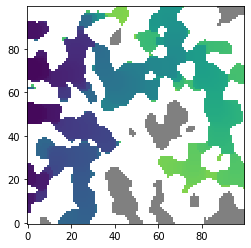

In [10]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, fps=5)
mov.save('image_based_ip_fps.gif', writer='imagemagick')

![image_based_ip_fps](https://user-images.githubusercontent.com/43128873/160906895-c18133bb-3ccd-4b62-ab08-7fbae3b79556.gif)

## `repeat`

This variable indicates whether the animation [repeats](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib.animation.ArtistAnimation) when the sequence of frames is completed. By default `repeat`=True.

  0%|          | 0/389 [00:00<?, ?it/s]

 35%|███▌      | 138/389 [00:00<00:00, 1379.72it/s]

 71%|███████   | 276/389 [00:00<00:00, 579.13it/s] 

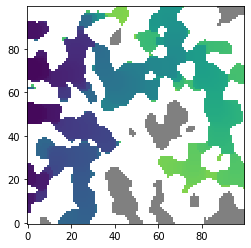

In [11]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, repeat=False)
mov.save('image_based_ip_repeat.gif', writer='imagemagick')

![image_based_ip_repeat](https://user-images.githubusercontent.com/43128873/160906900-825dc985-cb90-407b-bbc3-67aa18d26009.gif)